In [1]:
from nba_api.stats.endpoints.leaguedashplayerclutch import LeagueDashPlayerClutch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from adjustText import adjust_text

In [3]:
league_clutch = LeagueDashPlayerClutch(per_mode_detailed='Totals')

In [4]:
clutch_league = league_clutch.get_data_frames()[0]

In [5]:
sorted_points = clutch_league.sort_values(by='PTS', ascending=False)

In [6]:
top_30_clutchers = sorted_points.iloc[0:30]

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
from matplotlib.ticker import FormatStrFormatter

Text(66.91, 0.5, 'Field Goal Percentage')

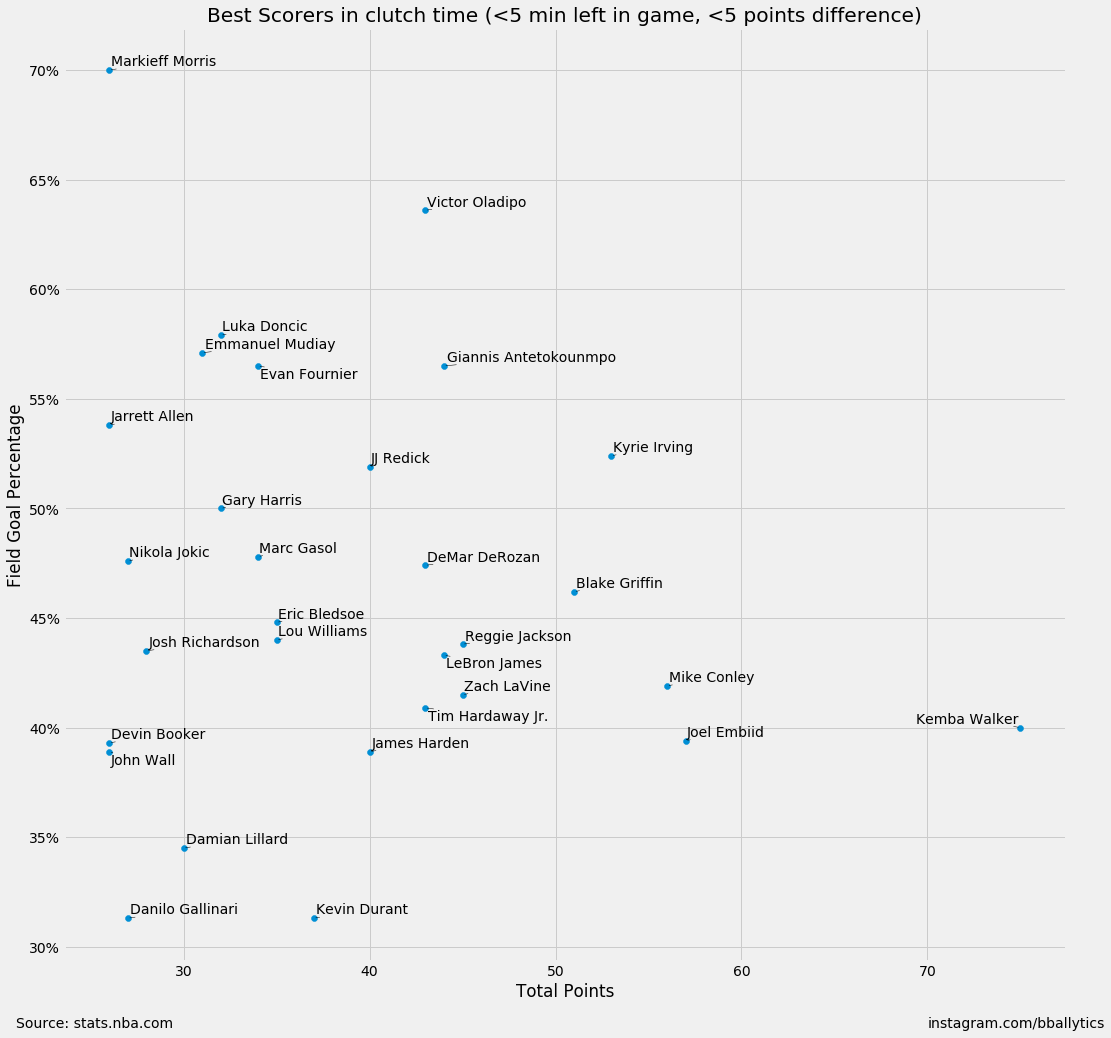

In [9]:

plt.figure(figsize=(16, 16))
plt.scatter(x=top_30_clutchers.PTS, y=top_30_clutchers.FG_PCT * 100)
texts = [
    plt.text(x=item.PTS, y=item.FG_PCT * 100, s=item.PLAYER_NAME) for index, item in top_30_clutchers.iterrows()
]
adjust_text(texts=texts, arrowprops=dict(arrowstyle='-', color='black'))
c_ax = plt.gca()
c_ax.yaxis.set_major_formatter(FormatStrFormatter("%2.f%%"))

plt.title("Best Scorers in clutch time (<5 min left in game, <5 points difference)")

plt.text(
    x=max(top_30_clutchers.PTS)-5,
    y=min(top_30_clutchers.FG_PCT*100)-5,
    s="instagram.com/bballytics"
)

plt.text(
    x=min(top_30_clutchers.PTS)-5,
    y=min(top_30_clutchers.FG_PCT*100)-5,
    s="Source: stats.nba.com"
)

plt.xlabel('Total Points')
plt.ylabel('Field Goal Percentage')
